In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({'x':[12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72], 
                   'y':[39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24] })

In [3]:
np.random.seed(200)

In [4]:
k=3

In [6]:
# centroids[i]= [x,y]
centroids={
    i+1: [np.random.randint(0,80),np.random.randint(0,80)]
    for i in range(k)
}

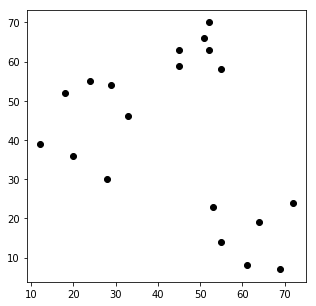

In [9]:
fig= plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'], color='k')

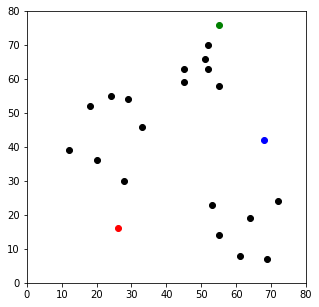

In [11]:
fig= plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'], color='k')
colmap= {1:'r', 2:'b', 3:'g'}
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [20]:
#Assignement Stage
def assignement(df,centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 + (y1- y2)^2)
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']- centroids[i][0])**2 + (df['y']- centroids[i][1])**2 ))
        
    centroids_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:, centroids_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color']= df['closest'].map(lambda x: colmap[x])    
    return df
df= assignement(df,centroids)
df.head()

,x,y,distance_from_1,distance_from_2,distance_from_3,closest,color
0,12,39,26.925824,56.080300,56.727418,1,r
1,20,36,20.880613,48.373546,53.150729,1,r
2,28,30,14.142136,41.761226,53.338541,1,r
3,18,52,36.878178,50.990195,44.102154,1,r
4,29,54,38.118237,40.804412,34.058773,3,g


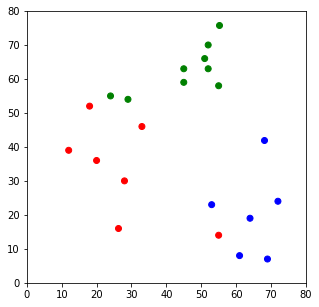

In [21]:
fig= plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

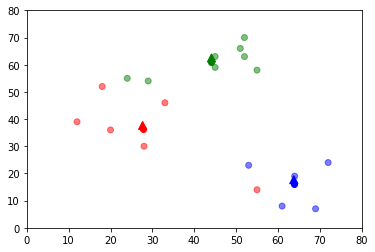

In [25]:
#update 

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
    
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)

for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])


plt.show()

In [27]:
df = assignement(df, centroids)

df.head()

,x,y,distance_from_1,distance_from_2,distance_from_3,closest,color
0,12,39,15.920811,56.595760,38.936045,1,r
1,20,36,7.668478,48.067453,34.742130,1,r
2,28,30,6.175669,38.367695,34.943034,1,r
3,18,52,18.550981,58.131575,27.631786,1,r
4,29,54,17.883108,51.379763,16.666302,3,g


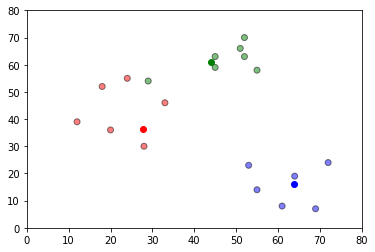

In [28]:
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')

for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

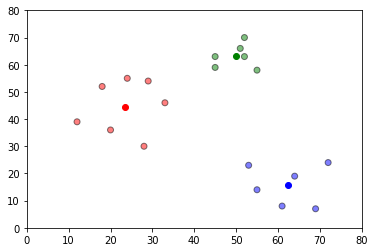

In [30]:
#continue until assigned categories don't change any more
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignement(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')

for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

    plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()
